<a href="https://colab.research.google.com/github/greenpenguinkaa/greenpenguinkaa/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_treeNew_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

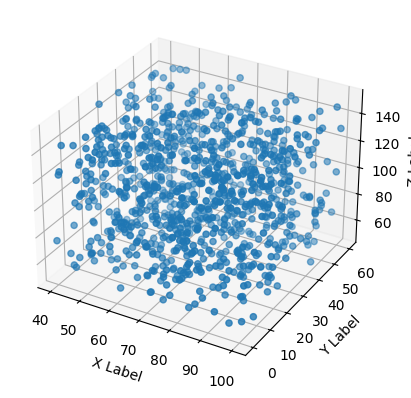

In [ ]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# df = pd.read_csv("datacsv.csv")

# Fixing random state for reproducibility
np.random.seed(19680801)

df = pd.read_csv("datacsv.csv")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
# m = df["Категория"]#.map({1:"^", 2:"o"}).values
xs = df["Температура уст-ва"].values
ys = df["Температура среды"].values
zs = df["Потребляемая мощность"].values
ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

X = df[["Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]]
# y = np.random.randint(1,5, size = df.shape[0])
y = df["Отказ"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Decision Tree Feature Importances:")
for feature, importance in zip(X.columns, dt.feature_importances_):
  print(f"{feature}: {importance:.4f}")


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf.feature_importances_):
  print(f"{feature}: {importance:.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]
Decision Tree Feature Importances:
Температура уст-ва: 0.0000
Температура среды: 0.0000
Категория: 0.0000
Потребляемая мощность: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
[[200]]
Random Forest Feature Importances:
Температура уст-ва: 0.0000
Температура среды: 0.0000
Категория: 0.0000
Потребляемая мощность: 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
num = 1
listMain = np.array([[], []])
listType = ["БП", "УМ"]
data_names = ["№", "Тип устройства", "Отказ", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]

num = 1
listD = [data_names]
for i in range(12000):
  listElem = [num, random.choice(listType), 0, 8760, random.randint(5, 70), random.randint(-25, 38), random.choice([1,2]), random.randint(1, 250)]
  listD.append(listElem)
  num+=1

with open('datacsvAll.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(listD)
f.close()

In [ ]:
dfA = pd.concat(
    map(pd.read_csv, ['datacsv.csv', 'datacsvAll.csv']), ignore_index=True)
print(dfA)

           № Тип устройства  Отказ  Время  Температура уст-ва  \
0          1             УМ      1   8760                  62   
1          2             УМ      1   8760                  72   
2          3             УМ      1   8760                  46   
3          4             УМ      1   8760                  91   
4          5             УМ      1   8760                  40   
...      ...            ...    ...    ...                 ...   
12995  11996             БП      0   8760                  66   
12996  11997             БП      0   8760                  13   
12997  11998             БП      0   8760                  64   
12998  11999             БП      0   8760                  52   
12999  12000             БП      0   8760                  37   

       Температура среды  Категория  Потребляемая мощность  
0                     27          2                    123  
1                     43          1                     59  
2                      2          2 

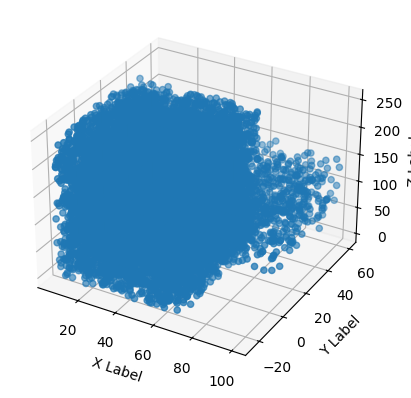

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = dfA.copy()

# Fixing random state for reproducibility
np.random.seed(19680801)

# df = pd.read_csv("datacsv.csv")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
m = df["Категория"]#.map({1:"^", 2:"o"}).values
xs = df["Температура уст-ва"].values
ys = df["Температура среды"].values
zs = df["Потребляемая мощность"].values
ax.scatter(xs, ys, zs)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
y = [1, 1, 1, 1, 0, 0]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
X = df[["Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]]
# y = np.random.randint(1,5, size = df.shape[0])
y = df["Отказ"]
# weight = compute_class_weight(class_weight="balanced", classes=np.unique(df["Отказ"]), y=df["Отказ"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=38)

dt = DecisionTreeClassifier(random_state=38, max_depth=5, class_weight = "balanced")
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Decision Tree Feature Importances:")
for feature, importance in zip(X.columns, dt.feature_importances_):
  print(f"{feature}: {importance:.4f}")


rf = RandomForestClassifier(random_state=38)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf.feature_importances_):
  print(f"{feature}: {importance:.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2400
           1       0.42      1.00      0.59       200

    accuracy                           0.89      2600
   macro avg       0.71      0.94      0.77      2600
weighted avg       0.96      0.89      0.91      2600

Confusion Matrix:
[[2126  274]
 [   0  200]]
Decision Tree Feature Importances:
Температура уст-ва: 0.4690
Температура среды: 0.1813
Категория: 0.0000
Потребляемая мощность: 0.3497
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2400
           1       0.89      0.64      0.74       200

    accuracy                           0.97      2600
   macro avg       0.93      0.81      0.86      2600
weighted avg       0.96      0.97      0.96      2600

Confusion Matrix:
[[2385   15]
 [  73  127]]
Random Forest Feature Importances:
Температура

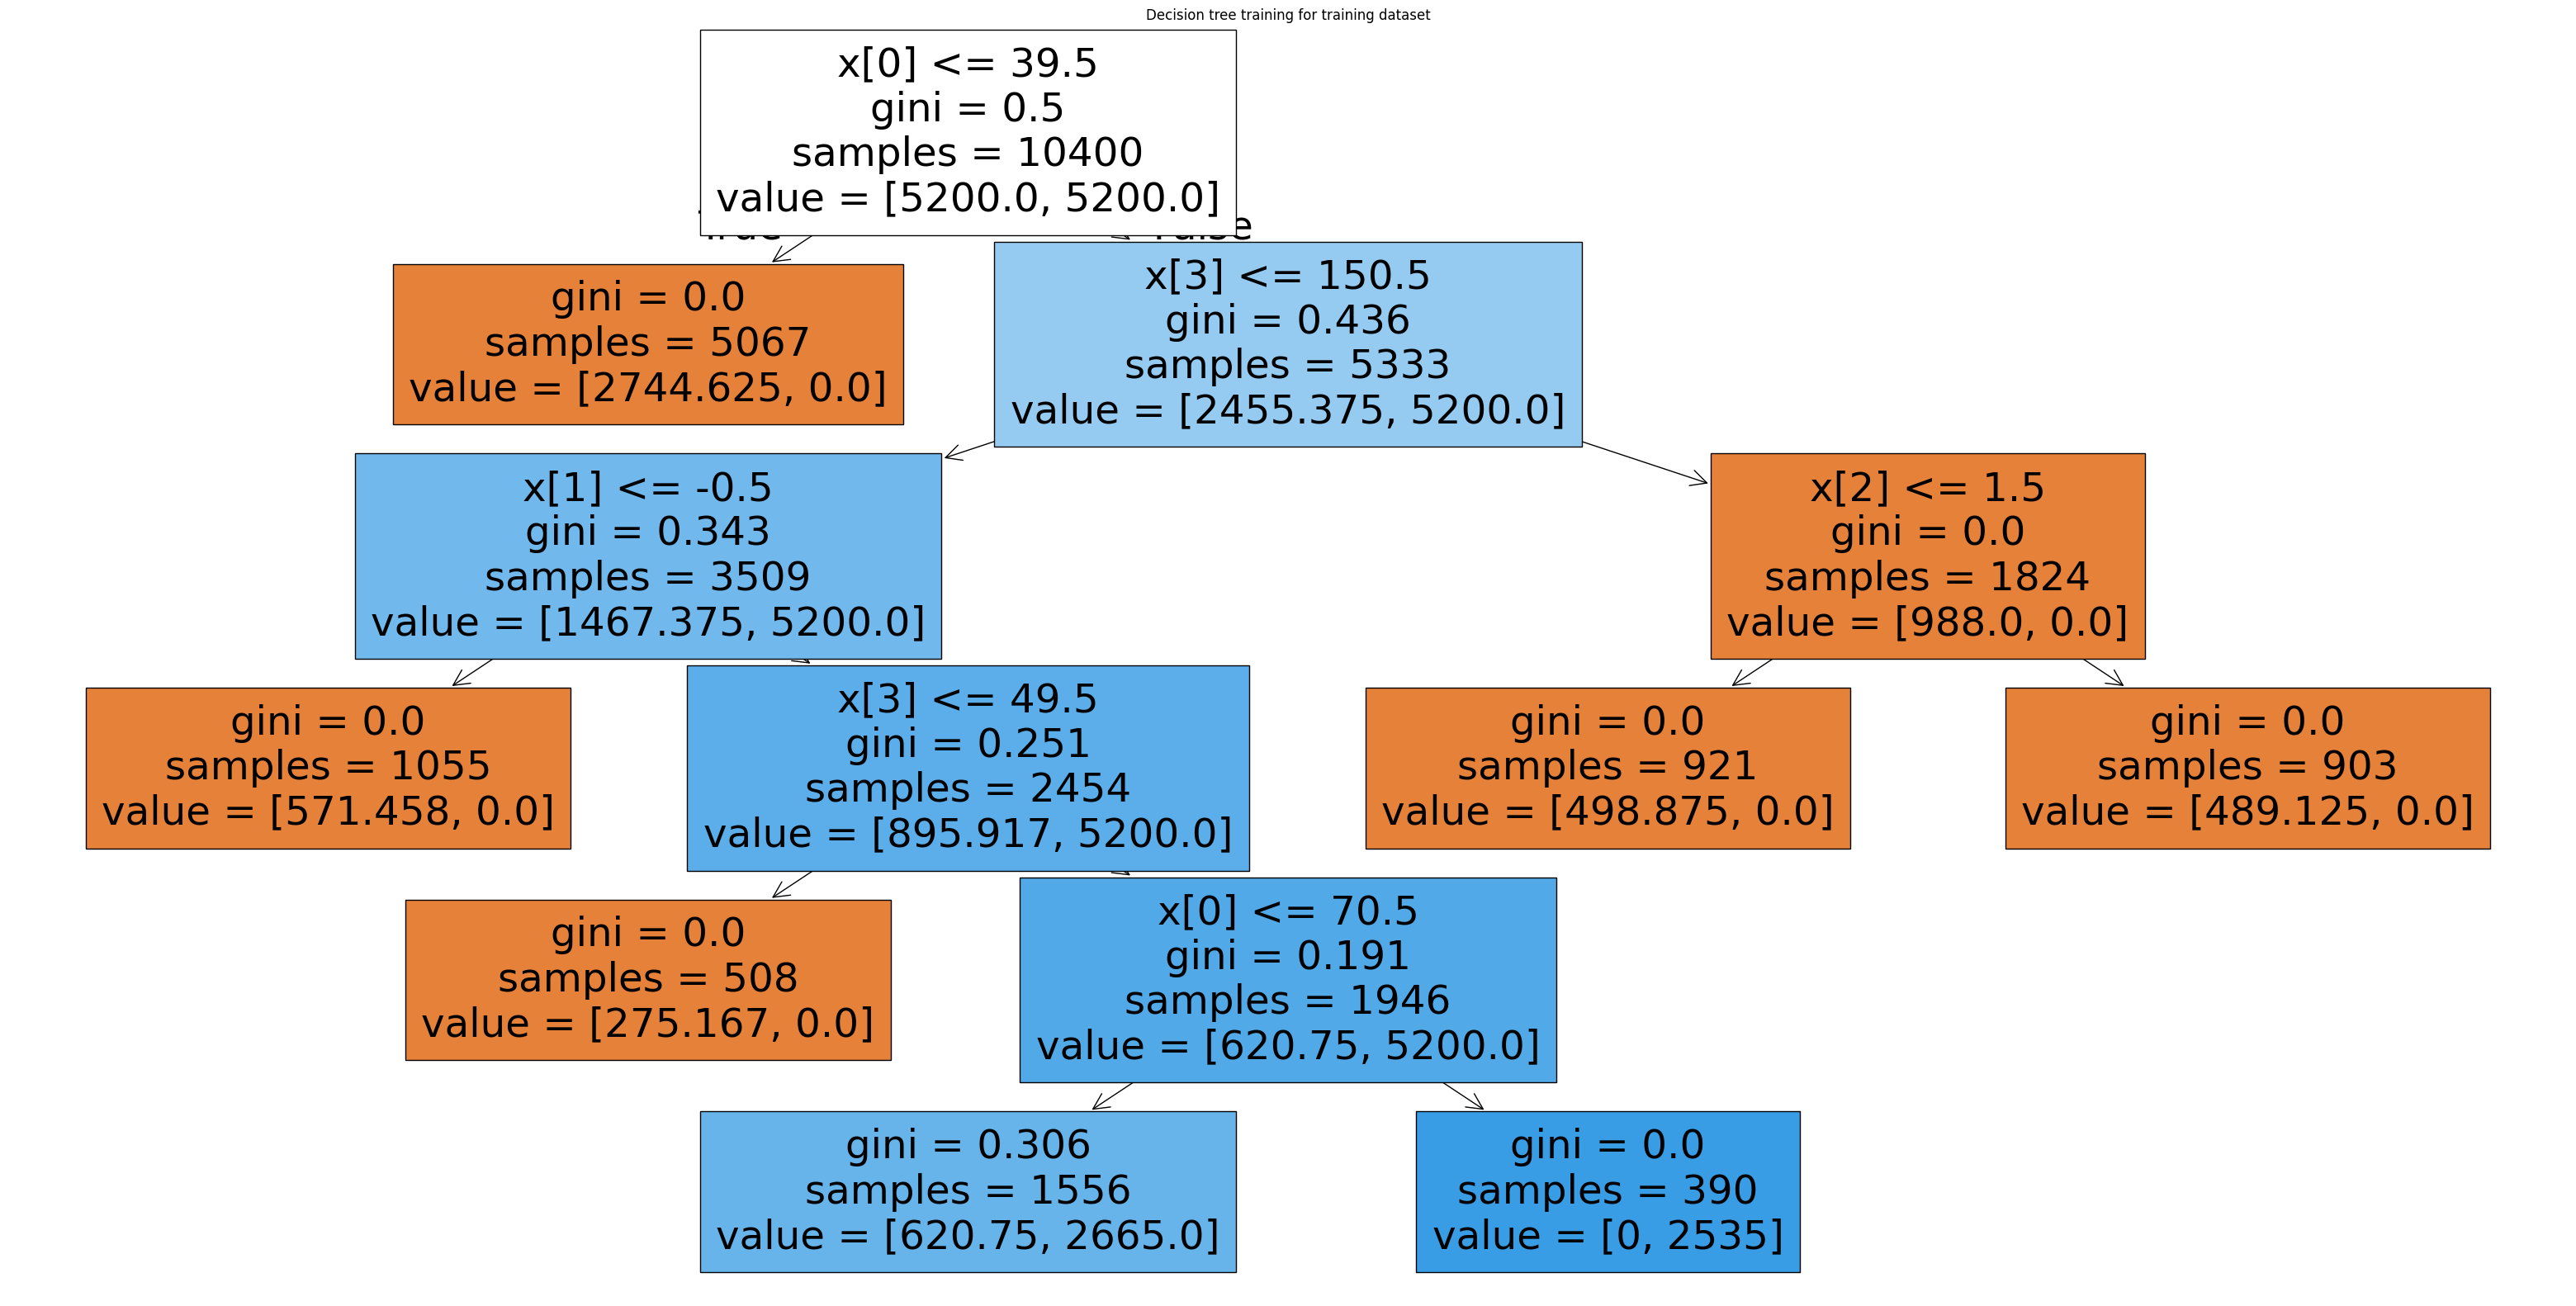

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = dt
# output size of decision tree
plt.figure(figsize=(40,20))
# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
X = df[["Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]]
# y = np.random.randint(1,5, size = df.shape[0])
y = df["Отказ"]
# weight = compute_class_weight(class_weight="balanced", classes=np.unique(df["Отказ"]), y=df["Отказ"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=38)

dt = DecisionTreeClassifier(random_state=38, max_depth=5, class_weight = "balanced")
dt.fit(X, y)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Decision Tree Feature Importances:")
for feature, importance in zip(X.columns, dt.feature_importances_):
  print(f"{feature}: {importance:.4f}")


rf = RandomForestClassifier(random_state=38)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Random Forest Feature Importances:")
for feature, importance in zip(X.columns, rf.feature_importances_):
  print(f"{feature}: {importance:.4f}")


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2400
           1       0.42      1.00      0.59       200

    accuracy                           0.89      2600
   macro avg       0.71      0.94      0.77      2600
weighted avg       0.96      0.89      0.91      2600

Confusion Matrix:
[[2126  274]
 [   0  200]]
Decision Tree Feature Importances:
Температура уст-ва: 0.4687
Температура среды: 0.1782
Категория: 0.0000
Потребляемая мощность: 0.3530
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2400
           1       0.89      0.64      0.74       200

    accuracy                           0.97      2600
   macro avg       0.93      0.81      0.86      2600
weighted avg       0.96      0.97      0.96      2600

Confusion Matrix:
[[2385   15]
 [  73  127]]
Random Forest Feature Importances:
Температура

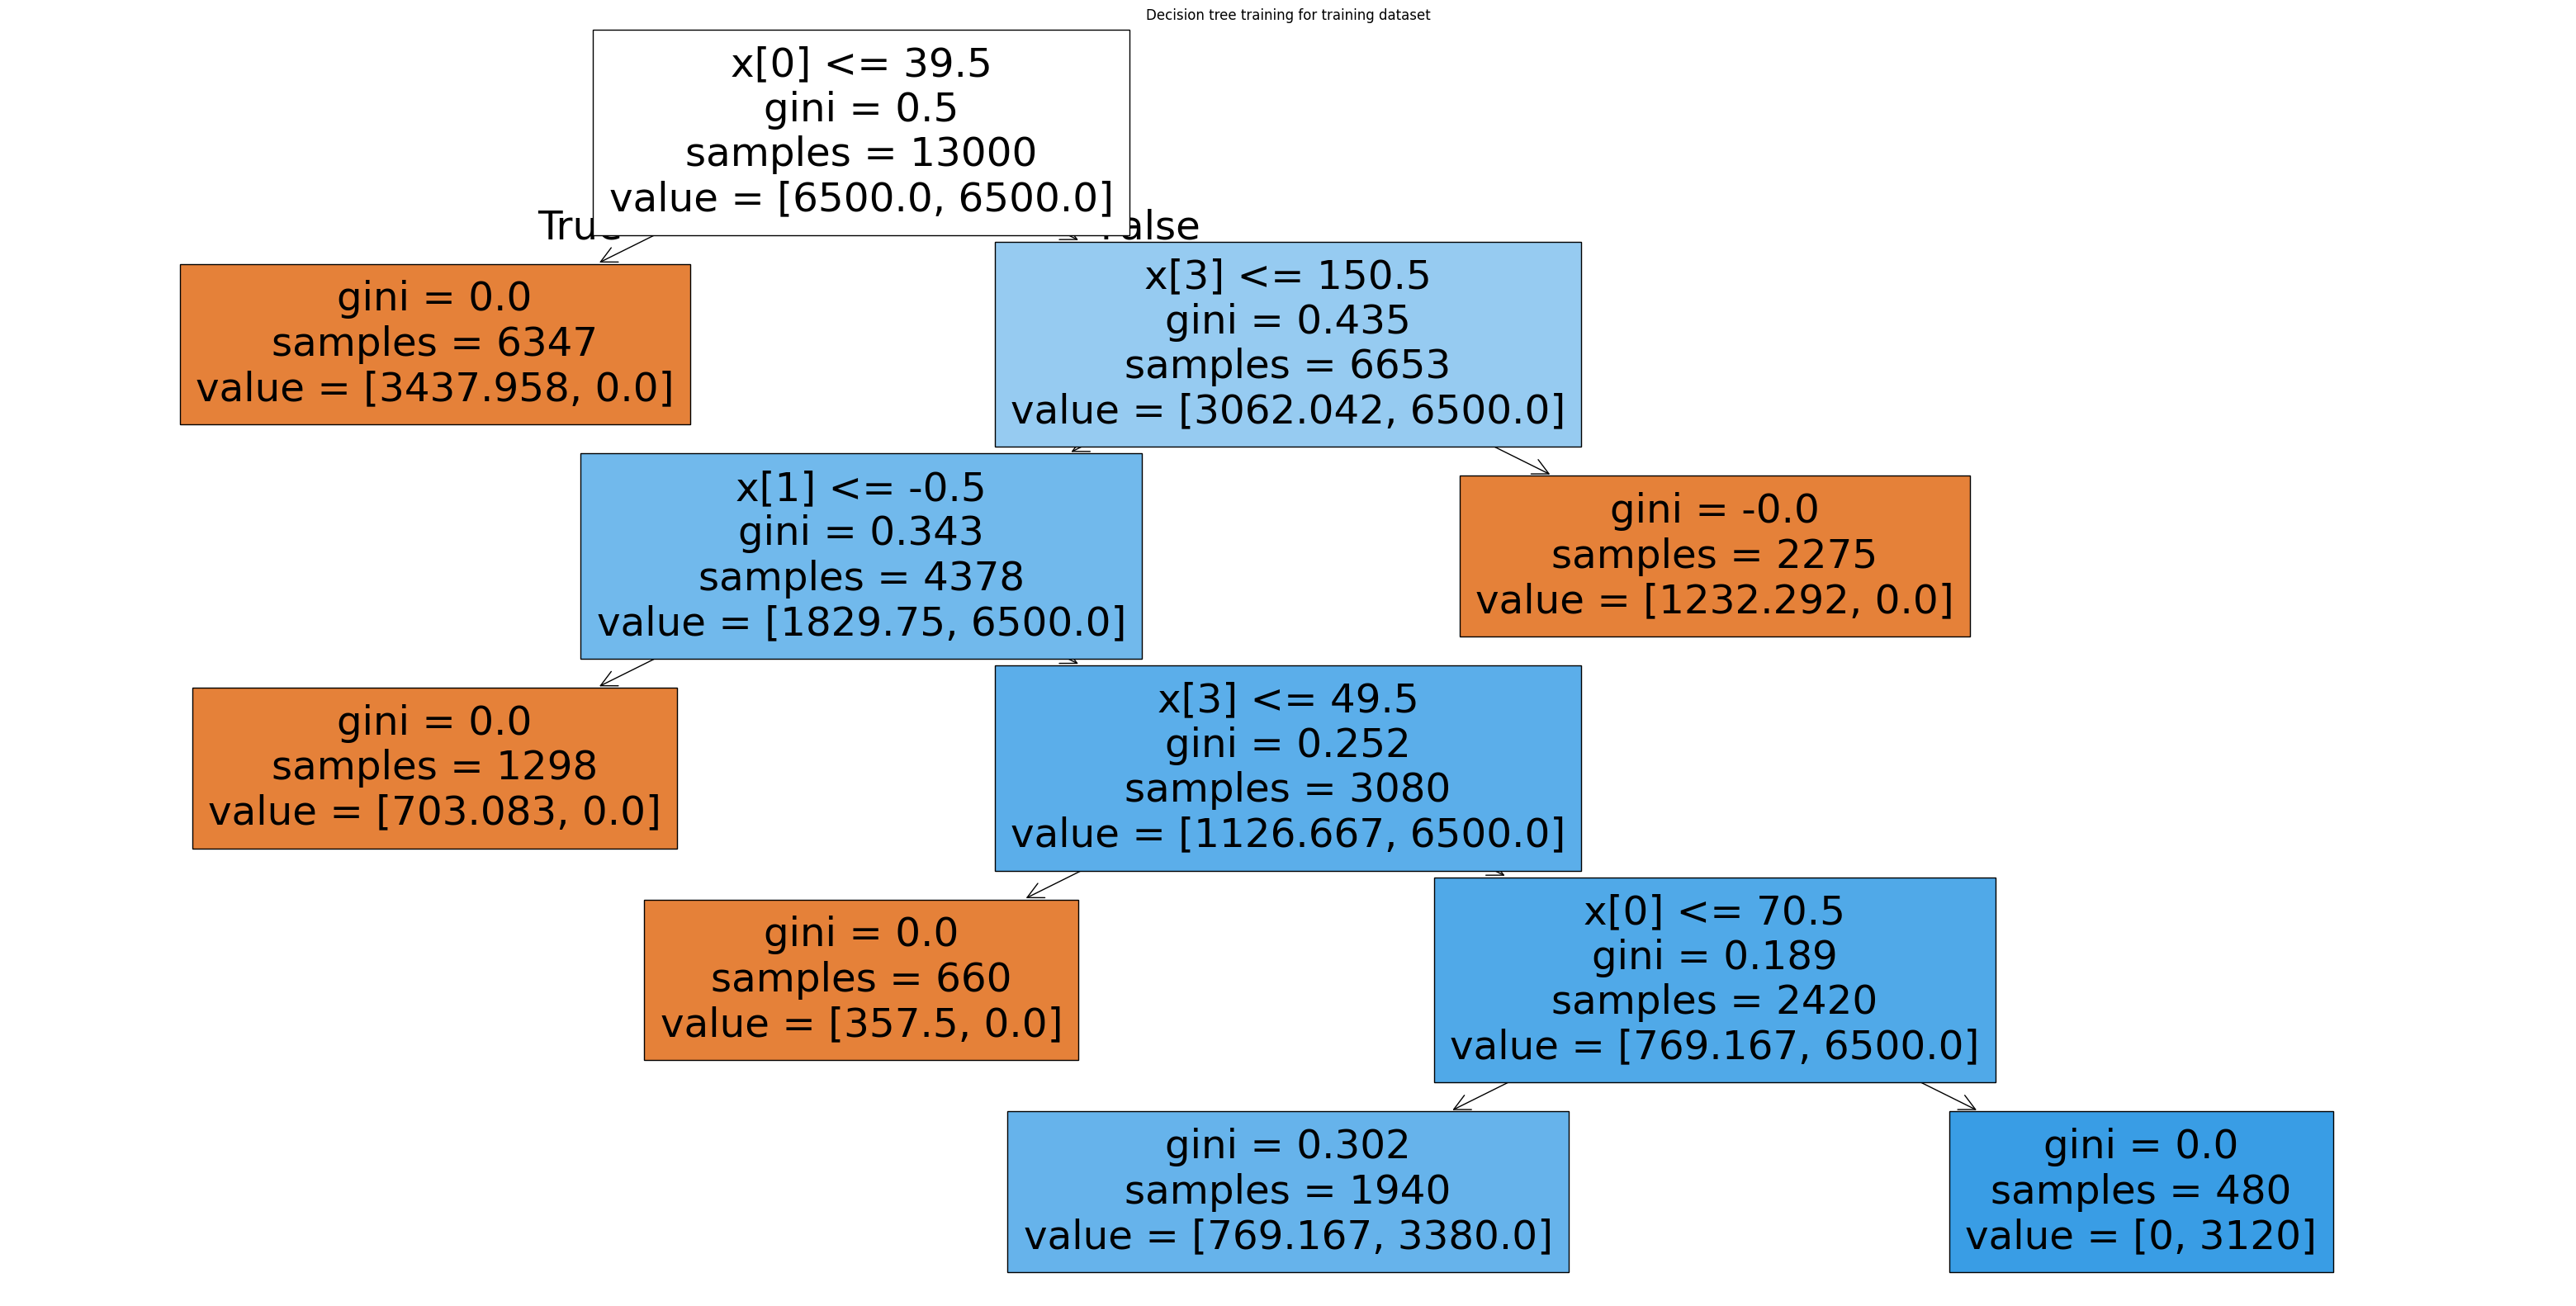

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = dt
# output size of decision tree
plt.figure(figsize=(40,20))
# providing the training dataset
clf = clf.fit(X, y)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

ROC AUC Score : 0.972196875


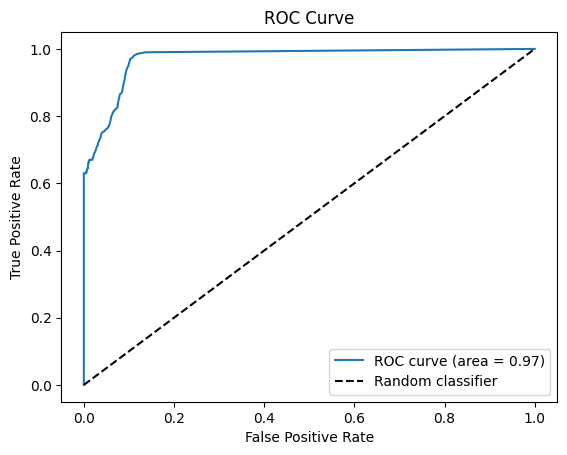

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y_pred_prob = rf.predict_proba(X_test)

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test.values, y_pred_prob[:,1], pos_label=1)

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test.values, y_pred_prob[:,1]) #, multi_class='ovr')
print('ROC AUC Score :',roc_auc)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
num = 1
listMain = np.array([[], []])
listType = ["БП", "УМ"]
data_names = ["№", "Тип устройства", "Отказ", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]

num = 1
listD = [data_names]
for i in range(1500):
  listElem = [num, random.choice(listType), 1, 336, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 672, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 1008, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 1344, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  1680, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2016, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2352, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2688, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  3024, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  3360, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), ]
  listD.append(listElem)
  num+=1


with open('datacsvTimeBreak.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(listD)
f.close()

num = 1
listMain = np.array([[], []])
listType = ["БП", "УМ"]
data_names = ["№", "Тип устройства", "Отказ", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]

num = 1
listD = [data_names]
for i in range(12000):
  listElem = [num, random.choice(listType), 0, 336, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(1, 100), 672, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(5, 120), 1008, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(9, 145), 1344, random.randint(10, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(12, 150), 1680, random.randint(10, 41), random.randint(-25, 38), random.choice([1,2]), random.randint(14, 170), 2016, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(15, 200), 2352, random.randint(13, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(17, 210), 2688, random.randint(18, 42), random.randint(-25, 38), random.choice([1,2]), random.randint(22, 205), 3024, random.randint(20, 42), random.randint(-25, 38), random.choice([1,2]), random.randint(21, 220), 3360, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(23, 225)]
  listD.append(listElem)
  num+=1


with open('datacsvAllTime.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(listD)
f.close()

dfB = pd.concat(
    map(pd.read_csv, ['datacsvTimeBreak.csv', 'datacsvAllTime.csv']), ignore_index=True)
print(dfB)

           № Тип устройства  Отказ  Время  Температура уст-ва  \
0          1             УМ      1    336                  49   
1          2             УМ      1    336                  46   
2          3             УМ      1    336                  42   
3          4             БП      1    336                  47   
4          5             УМ      1    336                  48   
...      ...            ...    ...    ...                 ...   
13495  11996             УМ      0    336                  32   
13496  11997             БП      0    336                  16   
13497  11998             БП      0    336                  15   
13498  11999             УМ      0    336                  24   
13499  12000             УМ      0    336                  39   

       Температура среды  Категория  Потребляемая мощность  Время.1  \
0                      5          1                    258      672   
1                      3          2                    260      672   
2     

In [ ]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing import sequence
import pandas as pd
# # Загрузка данных IMDb
# (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# # Проверка размерностей данных
# print(f"Размер x_train до обработки: {x_train.shape}")
# print(f"Размер y_train: {y_train.shape}")

# df = pd.read_csv("datacsv.csv")
# X = df[["Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]]
# # y = np.random.randint(1,5, size = df.shape[0])
# y = df["Отказ"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Ограничение длины отзывов
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Проверка размерностей после обработки
print(f"Размер x_train после обработки: {x_train.shape}")

# Создание модели
model = Sequential()
model.add(Embedding(5000, 32, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=64)

# Оценка модели
scores = model.evaluate(x_test, y_test, verbose=0)
print("Точность модели: %.2f%%" % (scores[1]*100))


ValueError: invalid literal for int() with base 10: 'Температура уст-ва'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

apple_training_complete = pd.read_csv("datacsv.csv")
apple_training_processed = apple_training_complete.iloc[:, 4:7].values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

features_set = []
labels = []
for i in range(60, 1260):
    features_set.append(apple_training_scaled[i-60:i, 0])
    labels.append(apple_training_scaled[i, 4])

features_set, labels = np.array(features_set), np.array(labels)

eatures_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(features_set.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(features_set, labels, epochs = 100, batch_size = 32)

apple_testing_complete = pd.read_csv(r'E:\Datasets\apple_testing.csv')
apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values

apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

predictions = model.predict(test_features)

predictions = scaler.inverse_transform(predictions)


plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

# LSTM

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import csv

In [ ]:
num = 1
listMain = np.array([[], []])
listType = ["БП", "УМ"]
data_names = ["№", "Тип устройства", "Отказ", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]

num = 1
listD = [data_names]
for i in range(1500):
  listElem = [num, random.choice(listType), 1, 336, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 672, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 1008, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), 1344, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  1680, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2016, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2352, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  2688, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  3024, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260),  3360, random.randint(40, 50), random.randint(-25, 38), random.choice([1,2]), random.randint(250, 260), ]
  listD.append(listElem)
  num+=1


with open('datacsvTimeBreak.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(listD)
f.close()

num = 1
listMain = np.array([[], []])
listType = ["БП", "УМ"]
data_names = ["№", "Тип устройства", "Отказ", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность",]
              #"Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность", "Время", "Температура уст-ва", "Температура среды", "Категория", "Потребляемая мощность"]

num = 1
listD = [data_names]
for i in range(12000):
  type_ = random.choice(listType)
  for i in range(10):
    listElem = [num,
                type_,
                0,
                (i+1)*336,
                np.random.randint(int(5+i*2), 45),
                np.random.randint(-25, 40), #если не [-22, 38] отказ 1
                np.random.choice([1,2]),
                np.random.randint(int(5+i*np.random.randint(3)) , 260) # >255 отказ
                ]


                # 672, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(5, 120),
                # 1008, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(9, 145),
                # 1344, random.randint(10, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(12, 150),
                # 1680, random.randint(10, 41), random.randint(-25, 38), random.choice([1,2]), random.randint(14, 170),
                # 2016, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(15, 200),
                # 2352, random.randint(13, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(17, 210),
                # 2688, random.randint(18, 42), random.randint(-25, 38), random.choice([1,2]), random.randint(22, 205),
                # 3024, random.randint(20, 42), random.randint(-25, 38), random.choice([1,2]), random.randint(21, 220),
                # 3360, random.randint(5, 40), random.randint(-25, 38), random.choice([1,2]), random.randint(23, 225)]
    listD.append(listElem)
  num+=1


with open('datacsvAllTime.csv', 'w', newline='') as f:
  writer = csv.writer(f)
  writer.writerows(listD)
f.close()


# dfB = pd.concat(
#     map(pd.read_csv, ['datacsvTimeBreak.csv', 'datacsvAllTime.csv']), ignore_index=True)
# print(dfB)

In [ ]:
def process_otkaz(df):
    df.loc[:, 'Отказ'] = ((df.loc[:,'Температура среды'] <-22).astype(int) + (df.loc[:,'Температура среды']>38).astype(int) + \
                         (df.loc[:,'Потребляемая мощность'] > 255).astype(int) + (df.loc[:,'Температура уст-ва'] > 42).astype(int))
    df.loc[:, 'Отказ'] = df.groupby(['№'])['Отказ'].cumsum().astype(bool).astype(int)
    return df



data = process_otkaz(pd.read_csv('datacsvAllTime.csv'))
data.head()

,№,Тип устройства,Отказ,Время,Температура уст-ва,Температура среды,Категория,Потребляемая мощность
0,1,БП,0,336,13,-7,1,28
1,1,БП,0,672,21,-10,1,221
2,1,БП,1,1008,44,20,1,121
3,1,БП,1,1344,43,3,1,85
4,1,БП,1,1680,33,37,1,70


In [ ]:
data.describe()

,№,Отказ,Время,Температура уст-ва,Температура среды,Категория,Потребляемая мощность
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,6000.500000,0.493450,1848.000000,28.992508,6.999317,1.501217,134.109525
std,3464.116037,0.499959,965.090546,9.539300,18.777833,0.500001,72.385519
min,1.000000,0.000000,336.000000,5.000000,-25.000000,1.000000,5.000000
25%,3000.750000,0.000000,1008.000000,22.000000,-9.000000,1.000000,72.000000
50%,6000.500000,0.000000,1848.000000,30.000000,7.000000,2.000000,134.000000
75%,9000.250000,1.000000,2688.000000,37.000000,23.000000,2.000000,197.000000
max,12000.000000,1.000000,3360.000000,44.000000,39.000000,2.000000,259.000000


<ipython-input-5-220dd86a7c8c>:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data.groupby(['№']).agg({'Отказ': sum}).hist()


array([[<Axes: title={'center': 'Отказ'}>]], dtype=object)

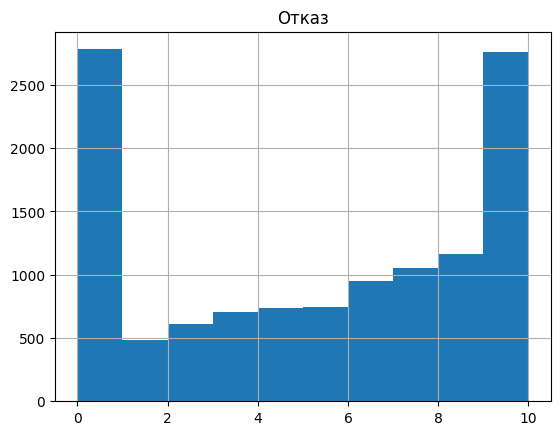

In [ ]:
data.groupby(['№']).agg({'Отказ': sum}).hist()

In [ ]:
data[data.loc[:, '№'] == 2]

,№,Тип устройства,Отказ,Время,Температура уст-ва,Температура среды,Категория,Потребляемая мощность
10,2,БП,1,336,24,-15,2,257
11,2,БП,1,672,11,-19,2,62
12,2,БП,1,1008,40,24,2,88
13,2,БП,1,1344,20,29,1,231
14,2,БП,1,1680,26,27,2,226
15,2,БП,1,2016,32,-2,1,81
16,2,БП,1,2352,17,35,1,254
17,2,БП,1,2688,19,-1,1,222
18,2,БП,1,3024,33,9,1,123
19,2,БП,1,3360,28,3,2,159


In [ ]:
data.iloc[:, 1].drop_duplicates()

,Тип устройства
0,БП
50,УМ


In [ ]:
{'BP': 1, 'UM': 2}

{'BP': 1, 'UM': 2}

In [ ]:
for i in enumerate(data.iloc[:, 1].drop_duplicates()):
  print(i)

(0, 'БП')
(1, 'УМ')


In [ ]:
device2idx = {v:k for k, v in enumerate(data.iloc[:, 1].drop_duplicates())}
idx2device = {v:k for k, v in device2idx.items()}



In [ ]:
print(device2idx, idx2device)

{'БП': 0, 'УМ': 1} {0: 'БП', 1: 'УМ'}


In [ ]:
data.iloc[:, 1].map(device2idx)

,Тип устройства
0,0
1,0
2,0
3,0
4,0
...,...
119995,1
119996,1
119997,1
119998,1


In [ ]:
data.iloc[:, 1] = data.iloc[:, 1].map(device2idx)

In [ ]:
data.head()

,№,Тип устройства,Отказ,Время,Температура уст-ва,Температура среды,Категория,Потребляемая мощность
0,1,0,0,336,13,-7,1,28
1,1,0,0,672,21,-10,1,221
2,1,0,1,1008,44,20,1,121
3,1,0,1,1344,43,3,1,85
4,1,0,1,1680,33,37,1,70


In [ ]:
data[data.iloc[:, 0] == 1]

,№,Тип устройства,Отказ,Время,Температура уст-ва,Температура среды,Категория,Потребляемая мощность
0,1,0,0,336,13,-7,1,28
1,1,0,0,672,21,-10,1,221
2,1,0,1,1008,44,20,1,121
3,1,0,1,1344,43,3,1,85
4,1,0,1,1680,33,37,1,70
5,1,0,1,2016,17,33,2,105
6,1,0,1,2352,38,18,2,184
7,1,0,1,2688,31,38,2,193
8,1,0,1,3024,36,-10,2,105
9,1,0,1,3360,23,30,2,174


In [ ]:
data.groupby(['№'])['№'].count()

,№
№,
1,10
2,10
3,10
4,10
5,10
...,...
11996,10
11997,10
11998,10


In [ ]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, data: pd.DataFrame):
        self.data = data.copy()
        self.target_col = 'Отказ'
        self.group_pazam = '№'
        self.data.loc[:, self.group_pazam] -= 1

    def __len__(self, ):
        return len(self.data.loc[:, self.group_pazam].drop_duplicates())

    def __getitem__(self, idx):
        device_data = self.data[self.data.loc[:, self.group_pazam] == idx].sort_values(self.target_col, ascending=True)
        return torch.tensor(device_data.drop(self.target_col, axis=1).values.astype(np.float64), dtype=torch.float64), \
         torch.tensor(device_data[self.target_col].values.astype(np.float64), dtype = torch.float64).reshape(-1,1)

In [ ]:
dataset = CustomDataset(data)

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256)

In [ ]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, batch_first, bidirectional, dropout):
        super().__init__()
        self.lstm = nn.LSTM(
                            input_size=input_size,
                            hidden_size=hidden_size ,
                            num_layers=num_layers,
                            batch_first=True,
                            bidirectional=bidirectional,
                            dropout=dropout if num_layers > 1 else 0.0,
                            )

        if bidirectional:
            self.fc = nn.Linear(int(hidden_size*2), 1)
        else:
            self.fc = nn.Linear(hidden_size, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out, (hidden, _) = self.lstm(x)
        # if self.lstm.bidirectional:
        #     hidden = torch.cat((hidden[-2], hidden[-1]), dim=1)
        # else:
        #     hidden = hidden[-1]
        linear_out = self.fc(out)
        out = self.sigmoid(linear_out)
        return out


In [ ]:
features, labels = next(iter(train_dataloader))

In [ ]:
lstm_ = LSTMClassifier(input_size=7,
                            hidden_size=15,
                            num_layers=1,
                            batch_first=True,
                            bidirectional=False,
                            dropout=0.1,)
lstm_.double()

LSTMClassifier(
  (lstm): LSTM(7, 15, batch_first=True)
  (fc): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
# lstm_.forward(features.cpu())

In [ ]:
# lstm_(features).shape

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'


model = LSTMClassifier(input_size=7,
                            hidden_size=15,
                            num_layers=2,
                            batch_first=True,
                            bidirectional=True,
                            dropout=0.1,).to(device)
model.double()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

In [ ]:
from tqdm import tqdm



for epoch in range(5):
    loss_total = 0.0
    model.train()
    for idx, (features, labels)  in tqdm(
          enumerate(train_dataloader),
          total=len(train_dataloader),
          desc="loop over train batches",
      ):
          # print(rows, features.shape, labels.shape)
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss_total += loss.item()/len(train_dataloader)
        loss.backward()
        optimizer.step()
    print("loss/train: ", loss_total)

    model.eval()
    with torch.no_grad():
        loss_total_val = 0.0
        for idx, (features, labels)  in tqdm(
          enumerate(test_dataloader),
          total=len(test_dataloader),
          desc="loop over val batches",
      ):
          # print(rows, features.shape, labels.shape)
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            loss_val = criterion(outputs, labels)
            loss_total_val += loss_val.item()/len(test_dataloader)
        print("loss/: val", loss_total_val)




loop over train batches: 100%|██████████| 600/600 [00:14<00:00, 40.61it/s]


loss/train:  0.6864710821258072


loop over val batches: 100%|██████████| 10/10 [00:02<00:00,  3.51it/s]


loss/: val 0.6802570309409425


loop over train batches: 100%|██████████| 600/600 [00:14<00:00, 40.98it/s]


loss/train:  0.6730486906990323


loop over val batches: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]


loss/: val 0.6678486278441051


loop over train batches: 100%|██████████| 600/600 [00:14<00:00, 42.02it/s]


loss/train:  0.6617855361690044


loop over val batches: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]


loss/: val 0.6625233605052541


loop over train batches: 100%|██████████| 600/600 [00:14<00:00, 42.12it/s]


loss/train:  0.6539987774312219


loop over val batches: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]


loss/: val 0.6459859914317632


loop over train batches: 100%|██████████| 600/600 [00:15<00:00, 38.72it/s]


loss/train:  0.6401642120676019


loop over val batches: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]

loss/: val 0.6352517984660059
